In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from dateutil import parser
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('./data/cust_subsc.csv')

In [14]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)

In [15]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [16]:
dataset2 = dataset.copy().drop(columns=['user', 'first_open', 'screen_list', 'enrolled_date', 'enrolled'])

In [22]:
dataset2.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


In [23]:
dataset2.columns.values

array(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'liked'], dtype=object)

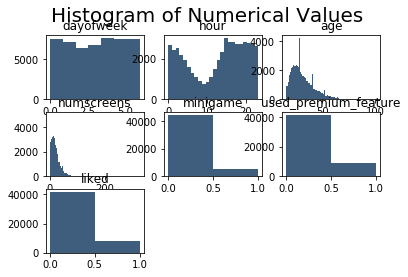

In [41]:
plt.suptitle('Histogram of Numerical Values', fontsize=20)
for i in range(0, dataset2.shape[1]):
    plt.subplot(3, 3, (i+1))
    #plt.figure(figsize=(10,10))
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
    col_vals = dataset2[dataset2.columns.values[i]]
    vals = np.size(col_vals.unique())
    plt.hist(col_vals, bins=vals, color='#3F5D7D')

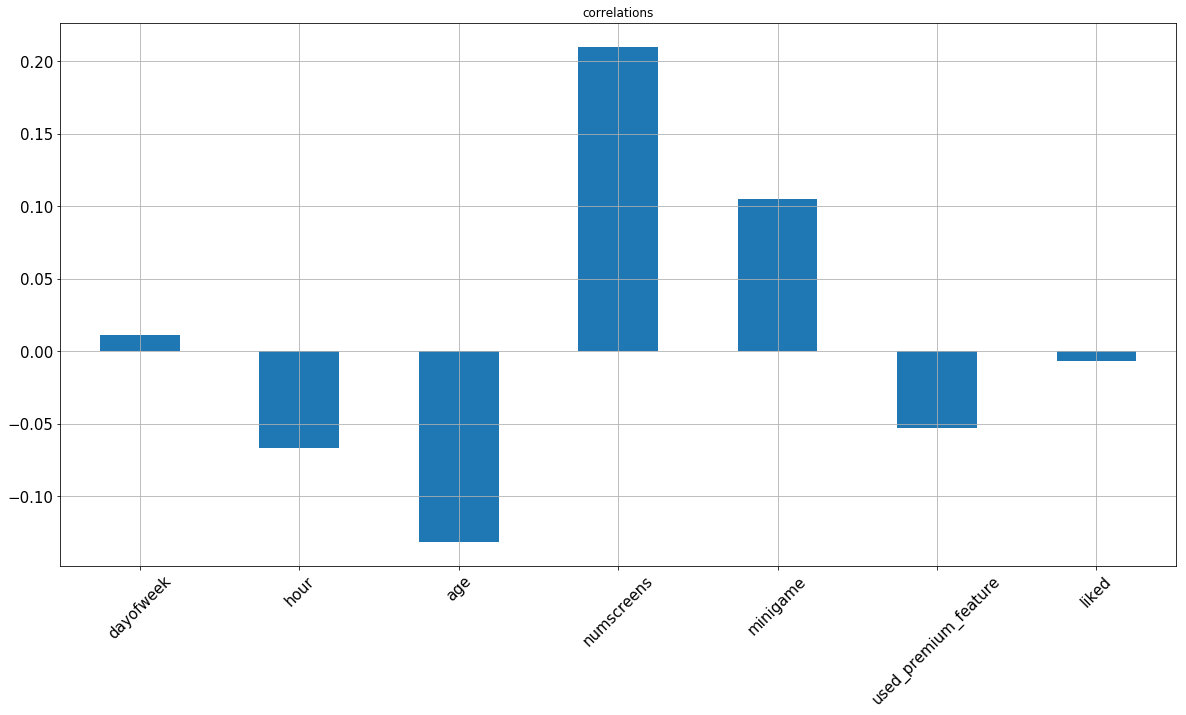

In [42]:
dataset2.corrwith(dataset.enrolled).plot.bar( figsize = (20,10),
                                              fontsize = 15,
                                              title = 'correlations',
                                              rot = 45,
                                              grid = True
                                            )

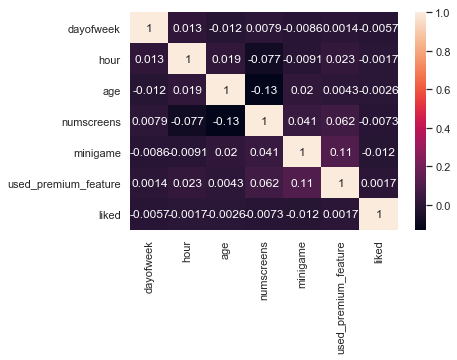

In [44]:
sns.set(style='white', font_scale=1)
corr = dataset2.corr()
sns.heatmap(corr, annot=True)

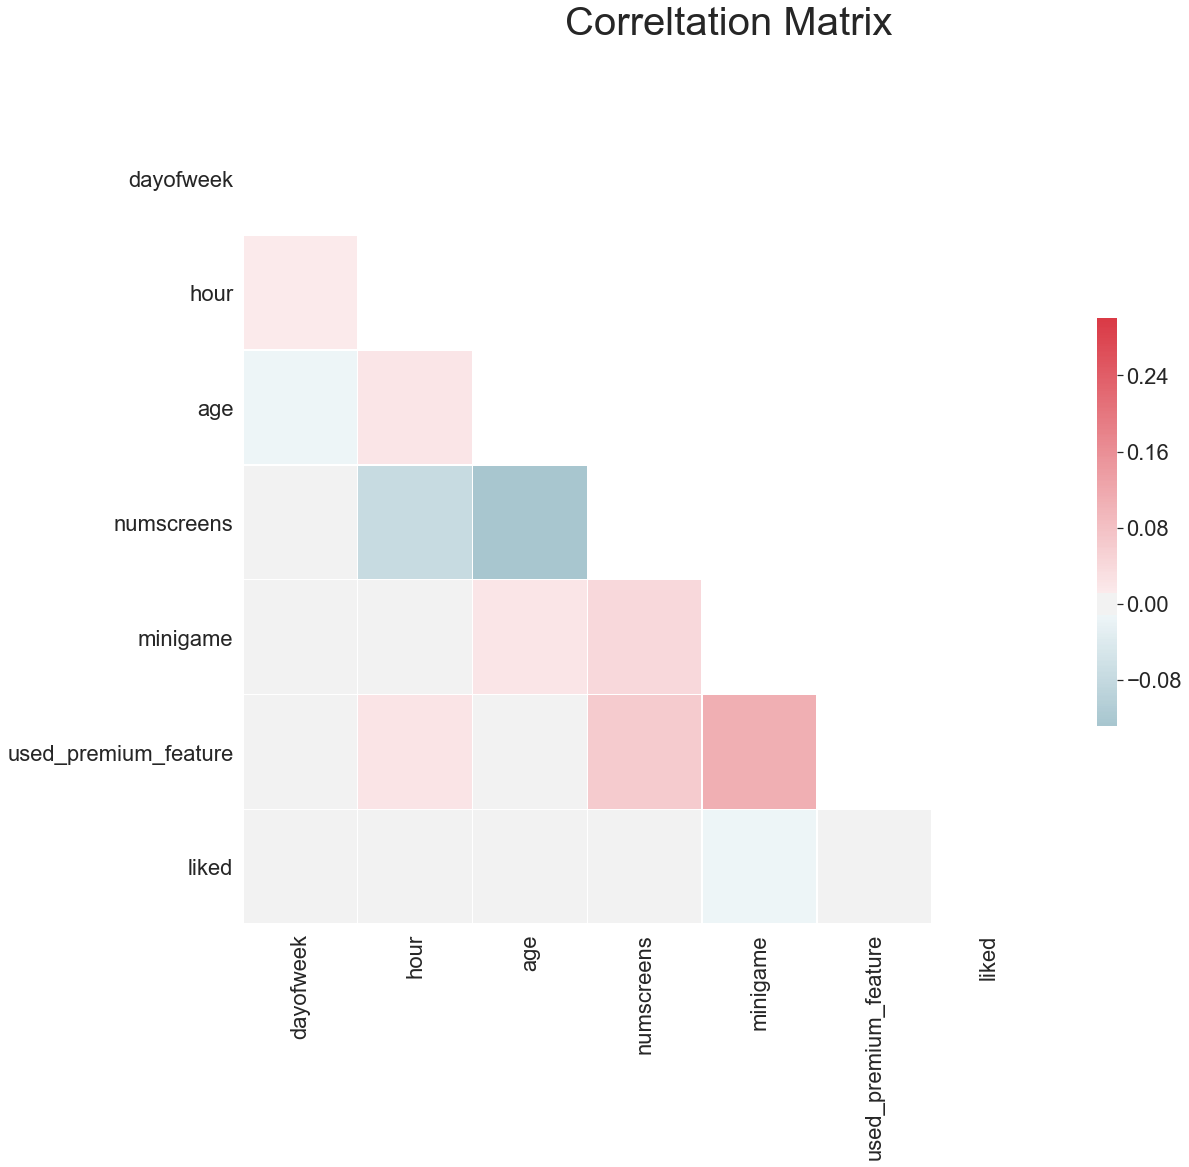

In [50]:
sns.set(style='white', font_scale=2)
corr = dataset2.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))
f.suptitle('Correltation Matrix', fontsize=40)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})